In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [130]:
df = pd.read_csv("imdb_top_1000.csv")

In [131]:
#removing from the dataset
df = df.drop(columns='Poster_Link')

In [107]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [108]:
#checking infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.3+ KB


In [109]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [110]:
#Understanding the dataset and how the values as distributed
df['Genre'].value_counts().head(10)

Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: Genre, dtype: int64

In [111]:
df['IMDB_Rating'].value_counts()

7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

In [112]:
df['Meta_score'].value_counts()

76.0    32
84.0    29
90.0    29
80.0    27
73.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: Meta_score, Length: 63, dtype: int64

In [113]:
df['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [137]:
#Changing datatype and filling NaN values from Gross, changed NaN for 0 for the moment because want to see all the films in the dataset
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''))

In [138]:
df['Gross'].fillna(0, inplace=True)

In [139]:
df['Gross'].value_counts()

0.0            169
4360000.0        5
9600000.0        2
25000000.0       2
5450000.0        2
              ... 
106662.0         1
10950.0          1
4018695.0        1
141319928.0      1
30500000.0       1
Name: Gross, Length: 824, dtype: int64

In [141]:
#Sorting the dataset to see the films with more Gross
df_sorted = df.sort_values(by='Gross',ascending=False)

In [146]:
df_sorted.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
59,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
623,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
60,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
652,Titanic,1997,UA,194 min,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0


In [171]:
#Want to check the Director that has more Gross
director_gross = df.groupby('Director')['Gross'].sum().reset_index()

In [172]:
director_gross_sorted = director_gross.sort_values(by='Gross', ascending=False)

In [174]:
director_gross_sorted.head()

,Director,Gross
470,Steven Spielberg,2.478133e+09
36,Anthony Russo,2.205039e+09
83,Christopher Nolan,1.937454e+09
202,James Cameron,1.748237e+09
383,Peter Jackson,1.597312e+09


In [179]:
#Checking if the director has more Gross because has more films
df[df['Director']=='Steven Spielberg'].shape[0]

13

In [177]:
df[df['Director']=='Anthony Russo'].shape[0]

4

In [178]:
df[df['Director']=='Christopher Nolan'].shape[0]

8

In [193]:
#checking top films by Gross from Spielberg
steven_spielberg_by_gross = df[df['Director']=='Steven Spielberg']

In [195]:
steven_spielberg_by_gross.sort_values(by='Gross', ascending=False).head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
688,E.T. the Extra-Terrestrial,1982,U,115 min,"Family, Sci-Fi",7.8,A troubled child summons the courage to help a...,91.0,Steven Spielberg,Henry Thomas,Drew Barrymore,Peter Coyote,Dee Wallace,372490,435110554.0
262,Jurassic Park,1993,UA,127 min,"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,68.0,Steven Spielberg,Sam Neill,Laura Dern,Jeff Goldblum,Richard Attenborough,867615,402453882.0
415,Jaws,1975,A,124 min,"Adventure, Thriller",8.0,When a killer shark unleashes chaos on a beach...,87.0,Steven Spielberg,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,543388,260000000.0
72,Raiders of the Lost Ark,1981,A,115 min,"Action, Adventure",8.4,"In 1936, archaeologist and adventurer Indiana ...",85.0,Steven Spielberg,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,884112,248159971.0
24,Saving Private Ryan,1998,R,169 min,"Drama, War",8.6,"Following the Normandy Landings, a group of U....",91.0,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,216540909.0


In [181]:
#Visualizing directors by Gross
nonzero_gross_directors = director_gross_sorted[director_gross_sorted['Gross']!= 0]

In [185]:
top15_directors = nonzero_gross_directors.head(15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Steven Spielberg'),
  Text(1, 0, 'Anthony Russo'),
  Text(2, 0, 'Christopher Nolan'),
  Text(3, 0, 'James Cameron'),
  Text(4, 0, 'Peter Jackson'),
  Text(5, 0, 'J.J. Abrams'),
  Text(6, 0, 'Brad Bird'),
  Text(7, 0, 'Robert Zemeckis'),
  Text(8, 0, 'David Yates'),
  Text(9, 0, 'Pete Docter'),
  Text(10, 0, 'Ridley Scott'),
  Text(11, 0, 'Quentin Tarantino'),
  Text(12, 0, 'James Gunn'),
  Text(13, 0, 'David Fincher'),
  Text(14, 0, 'Sam Mendes')])

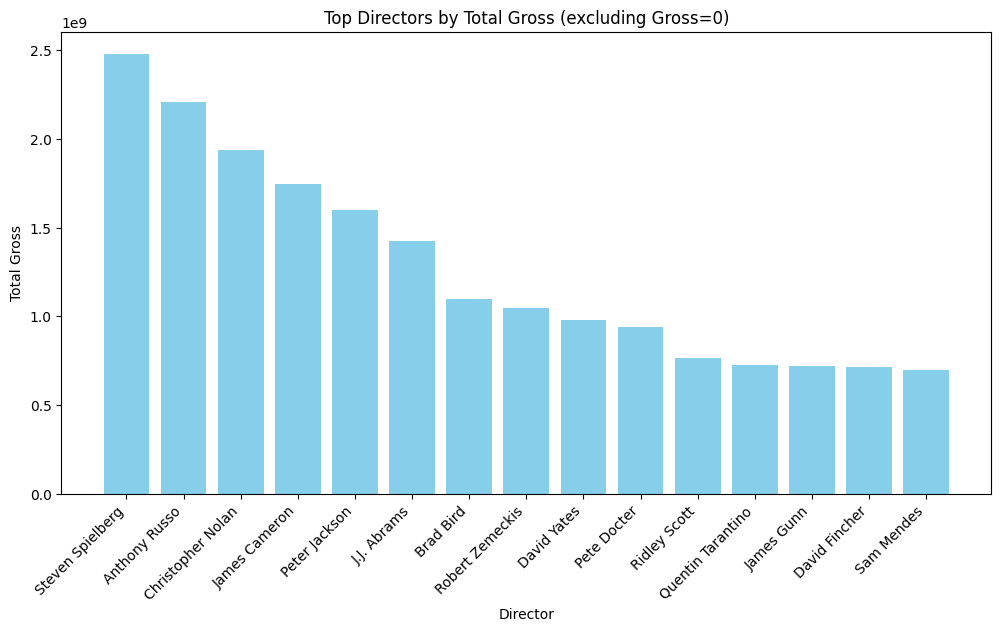

In [197]:
plt.figure(figsize=(12,6))
#commented is the code to see all the directors.
#plt.bar(nonzero_gross_directors['Director'], nonzero_gross_directors['Gross'], color='skyblue')
plt.bar(top15_directors['Director'], top15_directors['Gross'], color='skyblue')
plt.xlabel('Director')
plt.ylabel('Total Gross')
plt.title('Top Directors by Total Gross (excluding Gross=0)')
plt.xticks(rotation=45, ha='right')

In [210]:
#checking ratings and if they are related or similar
df.groupby('Director')['Meta_score'].mean()

Director
Aamir Khan              NaN
Aaron Sorkin           77.0
Abdellatif Kechiche    89.0
Abhishek Chaubey        NaN
Abhishek Kapoor        40.0
                       ... 
Zack Snyder            54.0
Zaza Urushadze         73.0
Zoya Akhtar            65.0
Çagan Irmak             NaN
Ömer Faruk Sorak        NaN
Name: Meta_score, Length: 548, dtype: float64